<a href="https://colab.research.google.com/github/Nikhil-patidar41/LinearRegression_insurance/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load the ness.
#load the data
#EDA -->checking the data (data preprocessing)
# feature eng -->rescaling, encoding
#Feature selection -->corr,vif,chi,etc
#model bilding
# model prediction
#model evalution

**Problem Statement**


Insurance premiums are often based on various factors that in the decide the amount that will be covered from the insurance company .As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charge that were levied upon the insurance company

The data gives you the information about the users including their age, sex ,bmi,hospitalization history,annual income ,etc .Analyze and gather insights from the data and create a linear regression  model that will best predict the insurance charge for a new set of data


**Dataset Information**

Insurance premium are often based on various factors that in the end decide the amount that will be coverd from the insurance company .As a data analyst/scientist you are given a set of historical data for an orginization customers and the respective cahrges that were levied upon the insurance company

The data gives you the information about the users including their age ,
sex,bmi,hospitalization, history,annual income, etc. Analyze and gather insigts from the data and create a linear regression model that will best predict the insurance charges for a new set f data

**Dataset Information**

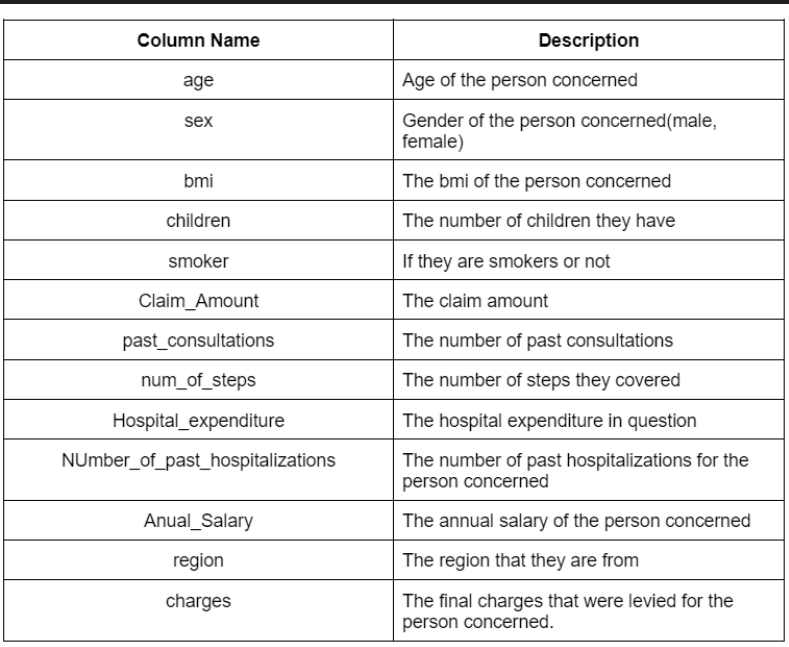

Importing Initial Python Packages to build an approach towards the business problem


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [ ]:
insurance=pd.read_csv('new_insurance_data.csv')
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
insurance.shape

(1338, 13)

In [ ]:
insurance.ndim

2

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
insurance.describe().round()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.0,1335.0,1333.0,1324.0,1332.0,1335.0,1334.0,1336.0,1.332000e+03,1338.0
mean,39.0,31.0,1.0,33361.0,15.0,910005.0,15841792.0,1.0,3.696849e+08,13270.0
std,14.0,6.0,1.0,15617.0,7.0,91886.0,26693048.0,1.0,5.668843e+08,12110.0
min,18.0,16.0,0.0,1920.0,1.0,695430.0,29453.0,0.0,2.747072e+06,1122.0
25%,27.0,26.0,0.0,20769.0,9.0,847200.0,4077633.0,1.0,7.701932e+07,4740.0
50%,39.0,30.0,1.0,33700.0,15.0,914300.0,7490337.0,1.0,1.419361e+08,9382.0
75%,51.0,35.0,2.0,45052.0,20.0,971684.0,10840822.0,1.0,3.243499e+08,16640.0
max,64.0,53.0,5.0,77278.0,40.0,1107872.0,261631699.0,3.0,4.117197e+09,63770.0


In [ ]:
insurance.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,1329.000000,1338,1335.000000,1333.000000,1338,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,male,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,676,NaN,NaN,1064,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.310008,NaN,30.665112,1.090773,NaN,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,NaN,13270.422265
std,14.034818,NaN,6.101690,1.201856,NaN,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,NaN,1121.873900
25%,27.000000,NaN,26.302500,0.000000,NaN,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,NaN,9382.033000
75%,51.000000,NaN,34.687500,2.000000,NaN,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,NaN,16639.912515


**Cheking the distribution of each of the variables in the dataset**

/tmp/ipython-input-11-2235246551.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


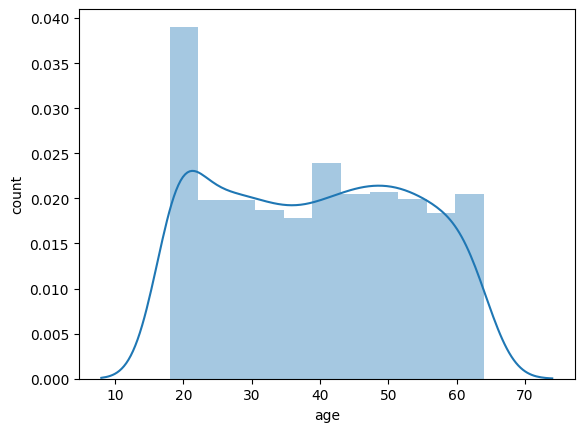

In [ ]:
#distribution of age column
sns.distplot(insurance['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Interpretation From the plot

The distribution is not normally distibuted ,and peak towards 20.

/tmp/ipython-input-12-2698634235.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['bmi'])


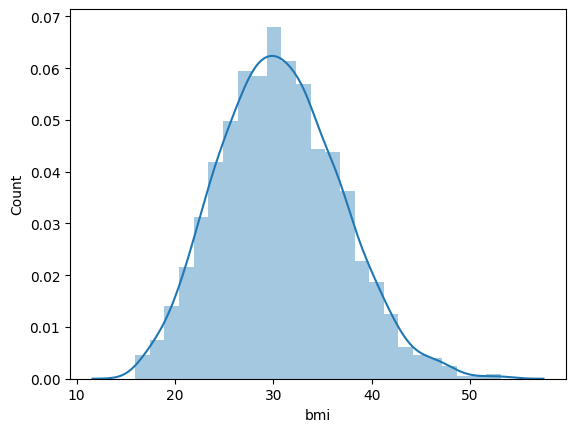

In [ ]:
# distribution of bmi column
sns.distplot(x=insurance['bmi'])
plt.xlabel('bmi')
plt.ylabel('Count')
plt.show()

**Interpretation from the plot **

The distribution can be assumed as a normal distribution that peaks towards 30.

/tmp/ipython-input-13-1338254856.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['children'])


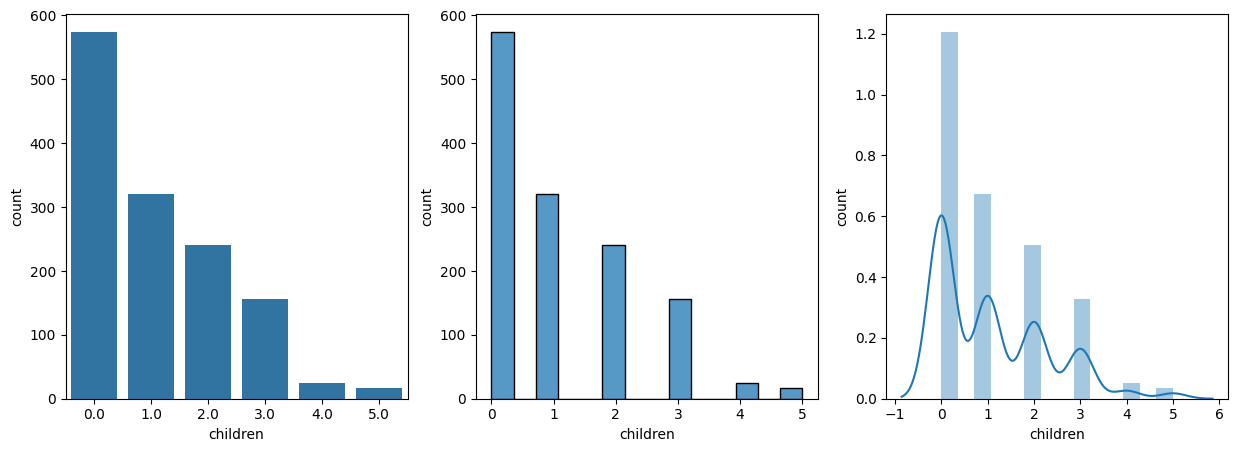

In [ ]:
#distribution of children colum
plt.subplots(1,3,figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x=insurance['children'])
plt.xlabel('children')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x=insurance['children'])
plt.xlabel('children')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel('children')
plt.ylabel('count')

plt.show()

**Interpretations from the plot **

The distribution is not normally distibuted , and we can reduce that most of the customers not have child in the data

/tmp/ipython-input-14-3974615966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['Claim_Amount'])


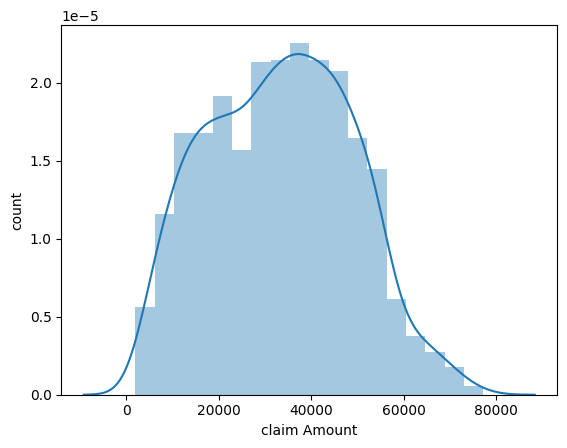

In [ ]:
#distribution of claim amount
sns.distplot(x=insurance['Claim_Amount'])
plt.xlabel('claim Amount')
plt.ylabel('count')
plt.show()

**Interpretation from the plot**

The distribution is right skewed - majority of the claim amount falls unders the lower ranges of the entire data.

/tmp/ipython-input-15-2300292527.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['past_consultations'])


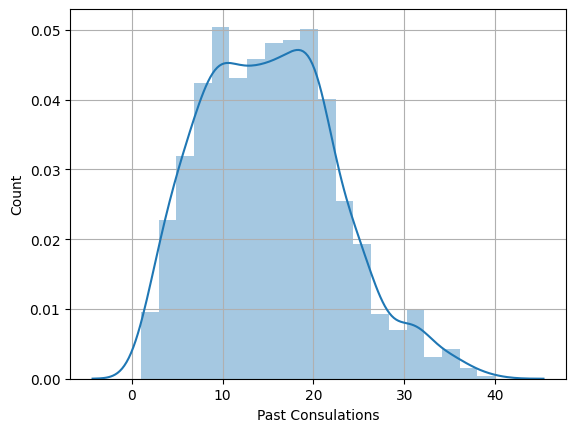

In [ ]:
#distribution of past consultation
sns.distplot(x=insurance['past_consultations'])
plt.xlabel('Past Consulations')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Interpretations from the plot**

The past consultantions is right skewed ,most of the consultations falls under 25

/tmp/ipython-input-16-3842935492.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=inss['num_of_steps'])


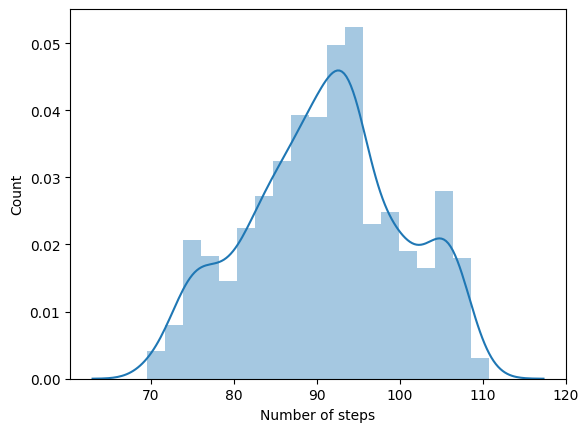

In [ ]:
#distributions of the numbr of steps column
inss=insurance.copy()
inss['num_of_steps']=inss['num_of_steps'].div(10000).round(2)
sns.distplot(x=inss['num_of_steps'])
plt.xlabel('Number of steps')
plt.ylabel('Count')
plt.show()

**Interpretations from the plot**

The distributio can roughly be assumed as a normal distribution but the plot is left skeawed

/tmp/ipython-input-17-3535223532.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=inss['Hospital_expenditure'])


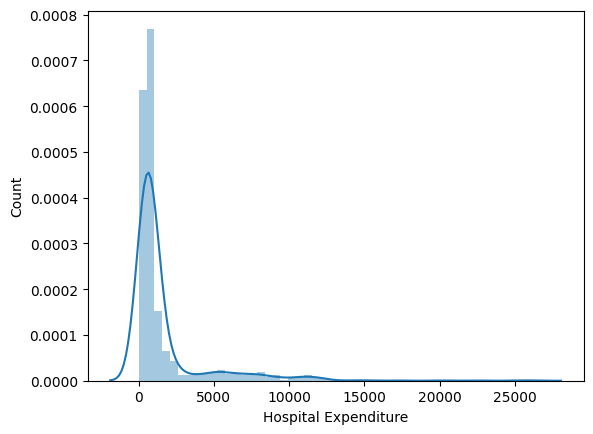

In [ ]:
# distribution of hospital expenditure
inss['Hospital_expenditure']=inss['Hospital_expenditure'].div(10000).round(2)
sns.distplot(x=inss['Hospital_expenditure'])
plt.xlabel('Hospital Expenditure')
plt.ylabel('Count')
plt.show()

**Interpretation from the plot**

the distribution is right skewed for the hospital expenditure

/tmp/ipython-input-18-1400382349.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['NUmber_of_past_hospitalizations'])


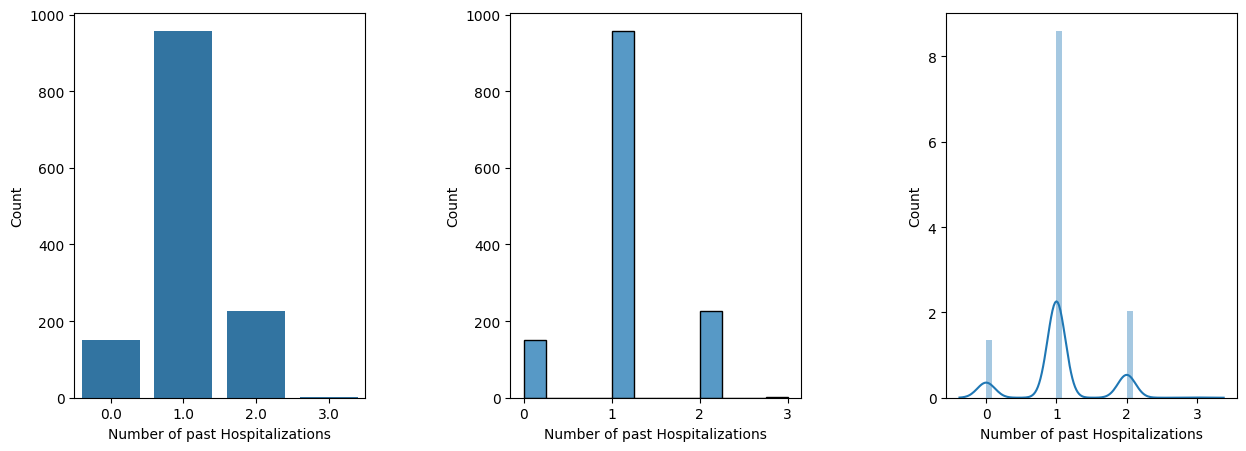

In [ ]:
#distribution of number of past hospitalizations
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.histplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.distplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

**Interpretations from the plot**

The plot shows the customers with 1.0 past hospitalization as the highest in the distribution followed by 2.0,0.0,and 3.0 hospitalizations

/tmp/ipython-input-19-1848214196.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['smoker'])


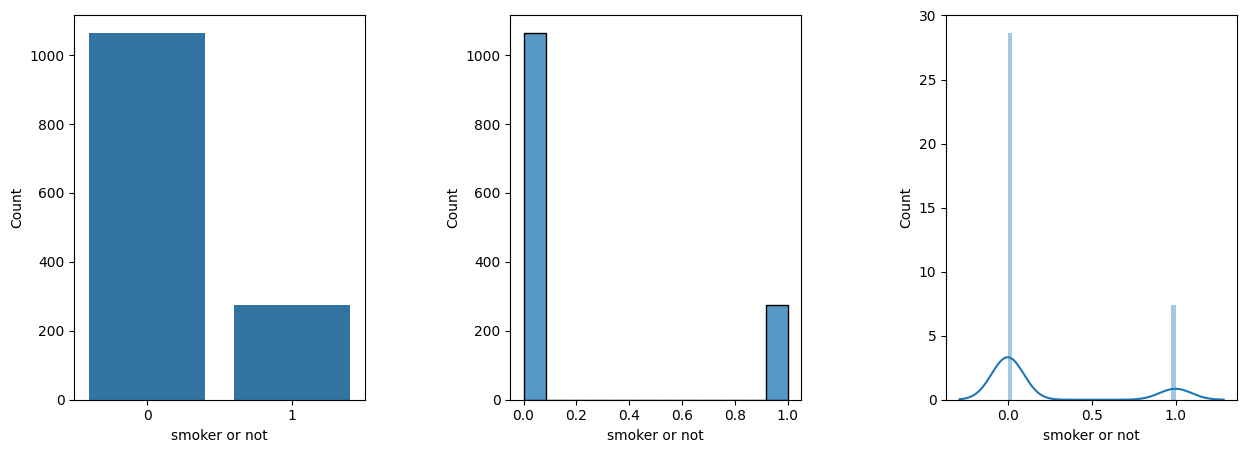

In [ ]:
#distribution of smoker column
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
insurance['smoker']=le.fit_transform(insurance['smoker'])
insurance['smoker']=insurance['smoker'].astype(int)

plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.histplot(x=insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.distplot(x=insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

**Interpretations from the plot**

Majority of the distribution shows the presence of non smokers

/tmp/ipython-input-20-617231502.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['sex'])


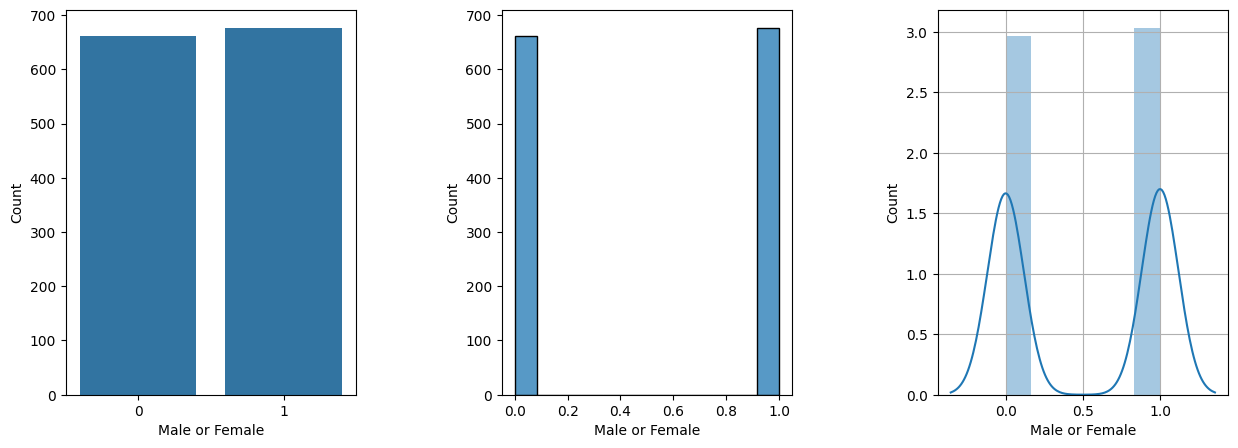

In [ ]:
#distribution of the sex columns
insurance['sex']=le.fit_transform(insurance['sex'])
insurance['sex']=insurance['sex'].astype(int)

plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.histplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.grid(True)
plt.show()

**Interpretations from the plot**

The gender column shows the presence of males slighly higher than the femal customer

/tmp/ipython-input-21-2205707533.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ins_dum['Anual_Salary'],bins=10)


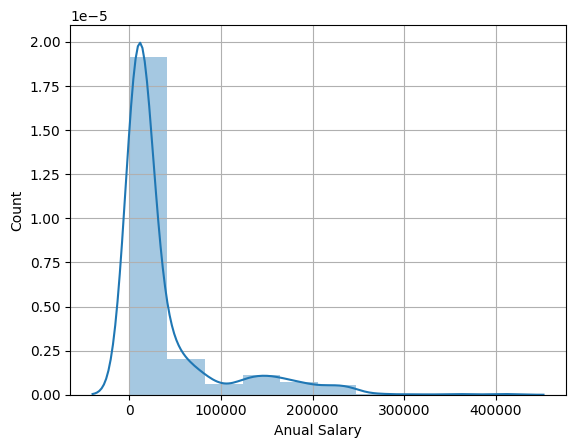

In [ ]:
# distribution of annual salary
ins_dum=insurance.copy()
ins_dum['Anual_Salary']=ins_dum['Anual_Salary'].div(10000).round(2)
sns.distplot(x=ins_dum['Anual_Salary'],bins=10)
plt.xlabel('Anual Salary')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Interpretations from the plot**

The annual salary distribution is right skewed

/tmp/ipython-input-22-2890410772.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['charges'])


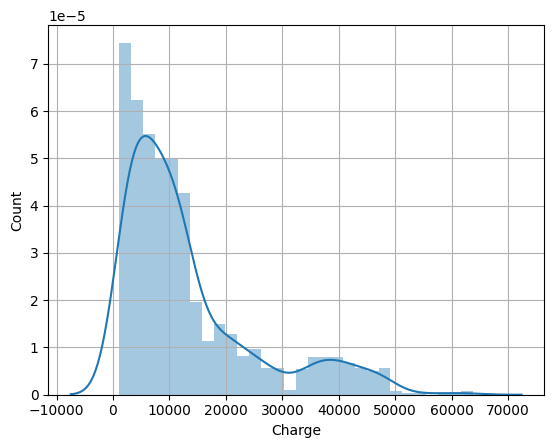

In [ ]:
#distribution of charges column
sns.distplot(x=insurance['charges'])
plt.xlabel('Charge')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Interpretations from the plot**

The annual salary distribution is right skewed.

/tmp/ipython-input-23-3386373518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['charges'])


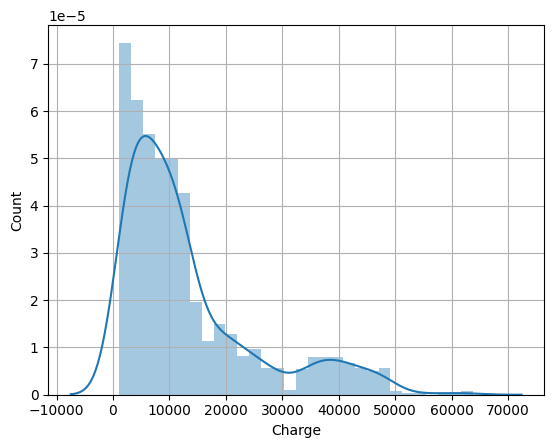

In [ ]:
#distribution of vharges column
sns.distplot(x=insurance['charges'])
plt.xlabel('Charge')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Interpretations from the plots**

The charges column is also right skewed

/tmp/ipython-input-24-3443550581.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['region'])


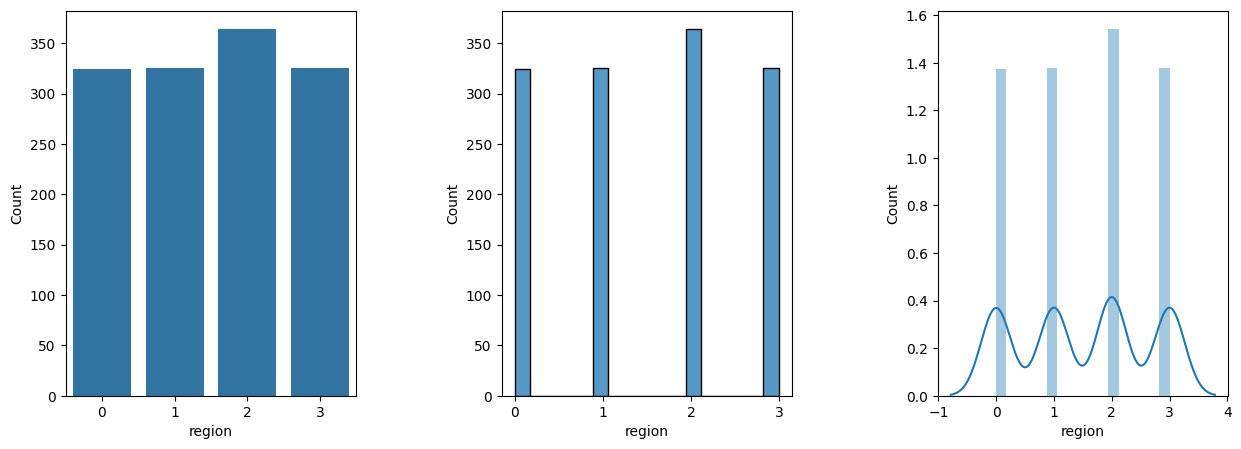

In [ ]:
# distribution of regioms columns
insurance['region']=le.fit_transform(insurance['region'])
insurance['region']=insurance['region'].astype(int)

plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.histplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.distplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

**Interpretations from the plot**

The region column show the data distributed equally in the entire population

**Measure of Peakedness and Outlier Analysis using Boxplots**

<Axes: ylabel='age'>

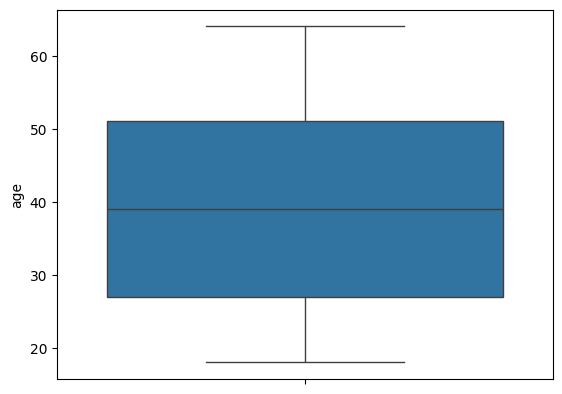

In [ ]:
sns.boxplot(insurance['age'])

<Axes: xlabel='bmi'>

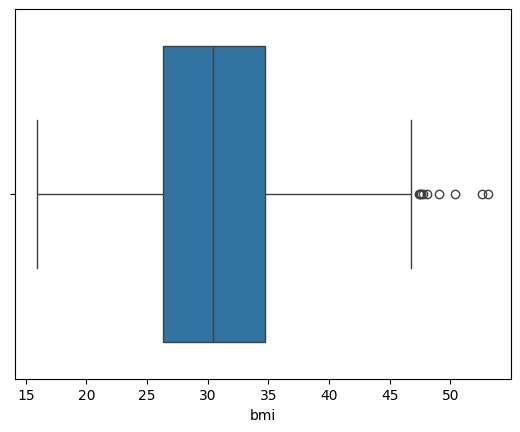

In [ ]:
# sns.boxenplot(x=insurance['bmi'])
sns.boxplot(x=insurance['bmi'])

<Axes: xlabel='children'>

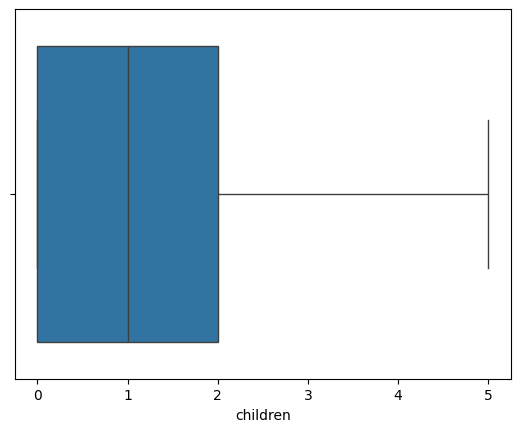

In [ ]:
sns.boxplot(x=insurance['children'])

<Axes: xlabel='Claim_Amount'>

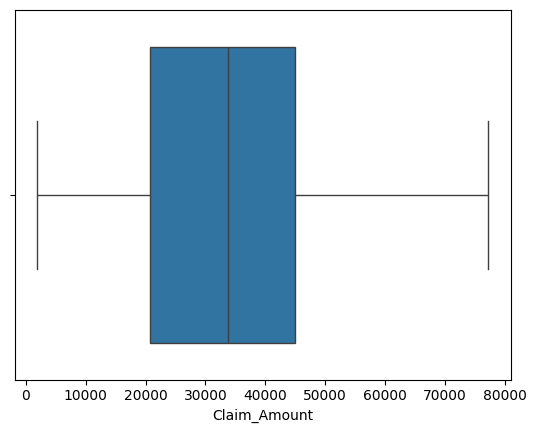

In [ ]:
sns.boxplot(x=insurance['Claim_Amount'])

<Axes: xlabel='past_consultations'>

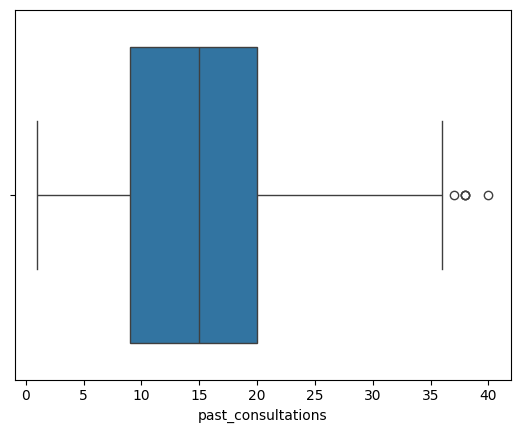

In [ ]:
sns.boxplot(x=insurance['past_consultations'])

<Axes: xlabel='num_of_steps'>

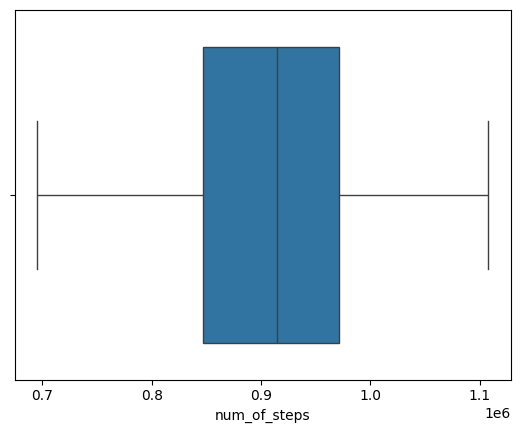

In [ ]:
sns.boxplot(x=insurance['num_of_steps'])

<Axes: xlabel='Hospital_expenditure'>

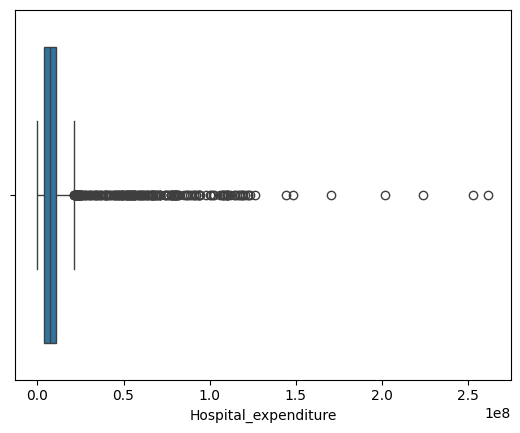

In [ ]:
sns.boxplot(x=insurance['Hospital_expenditure'])

<Axes: xlabel='Anual_Salary'>

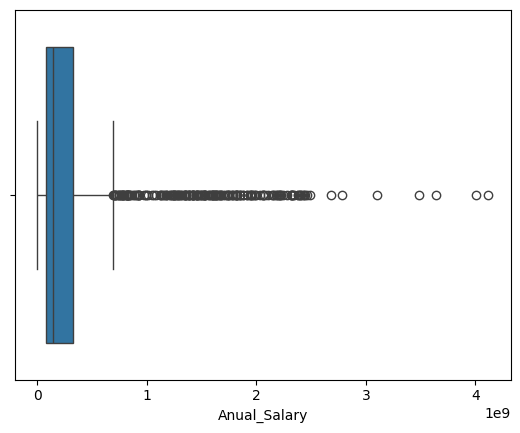

In [ ]:
sns.boxplot(x=insurance['Anual_Salary'])

<Axes: xlabel='region'>

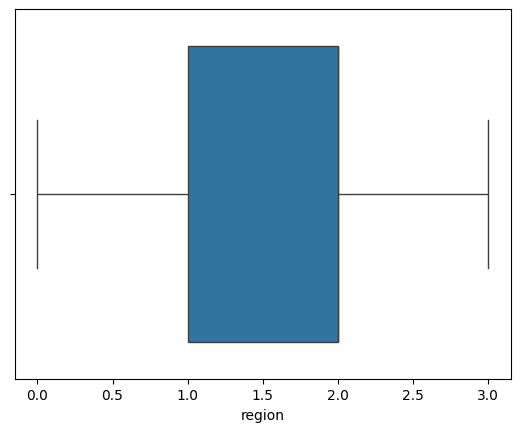

In [ ]:
sns.boxplot(x=insurance['region'])

Interpretations from the plot

<Axes: xlabel='charges'>

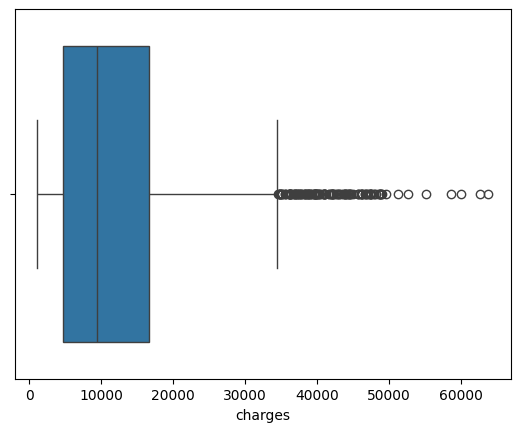

In [ ]:
sns.boxplot(x=insurance['charges'])

**Interpretations from the plots**
There is a presence of outliers in the columns  'charge' ,'annual_salary','hospital_expenditure','past_consultations','bmi',etc.

1.We will not treat the outliers ,since the target variable also consists of outliers which is driven from the other independent variable

**Understanding the relationship between the dependent and independent variables using a pairplot**

KeyError: "['NUmber_of_past_hospitalizationns'] not in index"

<Figure size 1000x500 with 0 Axes>

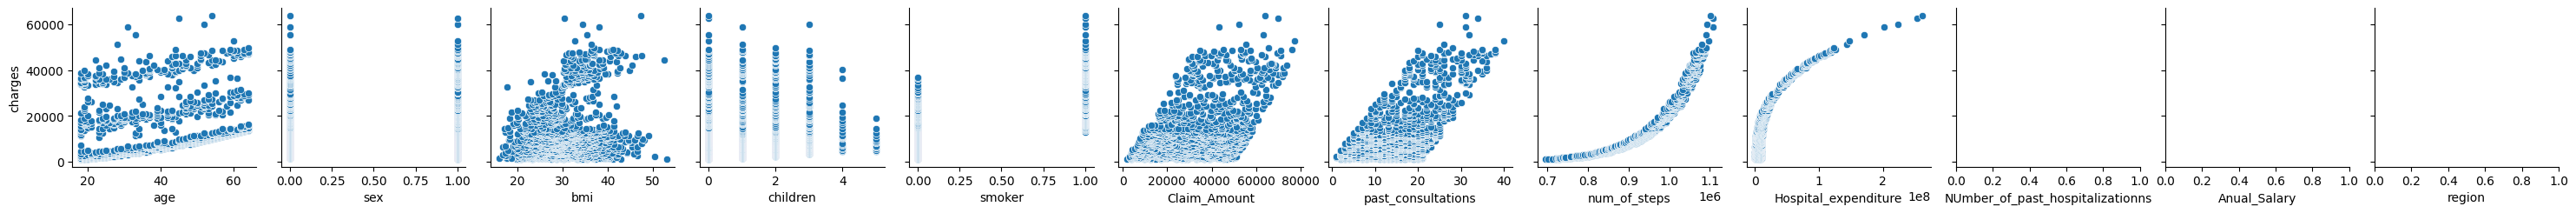

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data=insurance,y_vars=['charges'],x_vars=['age','sex','bmi',
                                                       'children','smoker',
                                                       'Claim_Amount',
                                                       'past_consultations',
                                                       'num_of_steps','Hospital_expenditure',
                                                       'NUmber_of_past_hospitalizationns',
                                                       'Anual_Salary','region'])
plt.show()

**Interpretations from the scatter plots**

1.Several of the feature shows a positive linear realtionship with the target variable. These feature will be further analyzed w.r.t the correlation to reach a conclusion for their usability in the linear regression model.




**Data Imputation**

In [ ]:
insurance.isna().sum()

### Approach for data imputation in the insurance data.
1. We have replaced the null values with the mean in columns where it showed close to a normal distribution i.e age, bmi, claim_amount, past_consultations, num_of_steps.
2. For the distributions that showed a skewed distribution, we have replaced the null values with the median of the column.

In [ ]:
insurance['age'] = insurance['age'].fillna(insurance['age'].median())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].median())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].median())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].median())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].median())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

In [ ]:
insurance.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [ ]:
insurance.shape

(1338, 13)

## Feature Selection for Data Mdeling

In [ ]:
correlation =insurance.corr()
correlation

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019154,0.112174,0.041710,-0.028792,0.122873,0.168479,0.513066,0.137208,0.359637,0.163478,0.004623,0.293735
sex,-0.019154,1.000000,0.045138,0.018533,0.076185,-0.003821,0.050274,0.010445,0.069940,0.000214,0.072702,0.004588,0.057292
bmi,0.112174,0.045138,1.000000,0.007790,0.003659,0.093447,0.130701,0.135994,0.256924,0.137115,0.241550,0.158218,0.198745
children,0.041710,0.018533,0.007790,1.000000,0.009608,0.041607,0.054806,0.163478,0.025315,0.185546,0.041260,0.015011,0.070877
smoker,-0.028792,0.076185,0.003659,0.009608,1.000000,0.334410,0.502794,0.665656,0.662698,0.588682,0.739676,-0.002181,0.787251
Claim_Amount,0.122873,-0.003821,0.093447,0.041607,0.334410,1.000000,0.271526,0.398285,0.369988,0.379923,0.404026,0.009098,0.435671
past_consultations,0.168479,0.050274,0.130701,0.054806,0.502794,0.271526,1.000000,0.559692,0.542150,0.500145,0.589292,-0.001864,0.627598
num_of_steps,0.513066,0.010445,0.135994,0.163478,0.665656,0.398285,0.559692,1.000000,0.624790,0.844983,0.733622,-0.041938,0.889753
Hospital_expenditure,0.137208,0.069940,0.256924,0.025315,0.662698,0.369988,0.542150,0.624790,1.000000,0.651827,0.957189,0.029446,0.871796
NUmber_of_past_hospitalizations,0.359637,0.000214,0.137115,0.185546,0.588682,0.379923,0.500145,0.844983,0.651827,1.000000,0.735802,-0.031450,0.820682


### Inferences
There is a strong to moderate correlation with the charges column with the following columns:
1. smoker
2. Claim_Amount
3. past_consultations
4. num_of_steps
5. Hospital_expenditure
6. NUmber_of_past_hospitalizations
7. Anual_Salary

The column 'age', 'sex', 'region', 'children', 'sex' shows no considerable correlation with the charges column, so we will not be considering these features for the initial model.


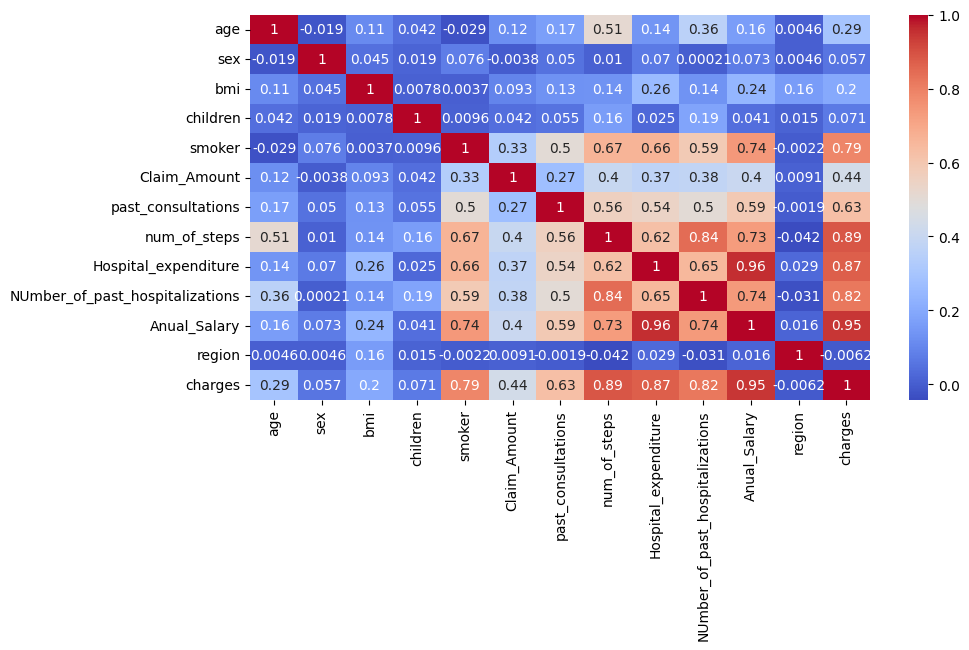

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

### The correlation heatmap shows the columns that will be most useful for the modeling. The sex, children, and region column shows no considerable correlation.

In [ ]:
!pip install sweetviz

In [ ]:
pip install numpy==1.24.4


In [ ]:
import sweetviz as sv

In [ ]:
report =sv.analyze(insurance)
report.show_html('nikhil_insurance.html')

### Data Preprocessing Before Model Trainig

In [ ]:
from sklearn.model_selection import train_test_split
#splitting the data for model 1
X=insurance.drop(['charges','age','sex','bmi','children','region'],axis=1)
y=insurance.iloc[:,-1]
# or
#y=insurance['charges']
#splitting the data for model1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#or
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [ ]:
X_train

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
560,0,29622.26103,6.0,886052.0,7.579867e+06,1.0,1.589946e+08
1285,1,66824.70947,23.0,1063413.0,8.042196e+07,2.0,1.919607e+09
1142,0,36320.75384,16.0,1001618.0,1.772151e+07,2.0,7.139574e+08
969,0,24827.43078,8.0,962113.0,1.214312e+07,1.0,2.928227e+08
486,0,47348.03370,10.0,888358.0,6.034962e+06,1.0,5.093163e+07
...,...,...,...,...,...,...,...
1095,0,47554.34106,19.0,1007896.0,1.132722e+07,1.0,5.662888e+08
1130,0,63672.07916,14.0,1000863.0,2.295519e+07,2.0,6.472972e+08
1294,1,42578.49702,24.0,1061168.0,9.188836e+07,2.0,2.038383e+09
860,0,27369.02461,22.0,943007.0,3.634140e+06,1.0,1.877743e+08


### Standardizing the features
Normalizing the features so that the samples will have the same mean and standard deviation.

In [ ]:
#feature scaling using the standardscalar
from sklearn.preprocessing import StandardScaler
# scaling the  data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.50874702, -0.2457309 , -1.23338465, ..., -0.29745518,
        -0.10122056, -0.36540273],
       [ 1.96561348,  2.14271388,  1.08072229, ...,  2.44746197,
         1.76612428,  2.78222091],
       [-0.50874702,  0.18432091,  0.12785473, ...,  0.08471359,
         1.76612428,  0.62675985],
       ...,
       [ 1.96561348,  0.58607603,  1.21684623, ...,  2.87955205,
         1.76612428,  2.99456786],
       [-0.50874702, -0.39039156,  0.94459835, ..., -0.44614248,
        -0.10122056, -0.31395035],
       [-0.50874702,  0.25267611,  1.4890941 , ...,  0.01197612,
         1.76612428,  0.57733069]])

In [ ]:
y_train_arr=y_train.values
y_train=y_train_arr.reshape((-1,1))

In [ ]:
y_train

array([[ 7731.85785],
       [42983.4585 ],
       [25656.57526],
       ...,
       [44260.7499 ],
       [12235.8392 ],
       [24476.47851]])

In [ ]:
y_train = sc.fit_transform(y_train)

## Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
model_uno=LinearRegression()
model_uno.fit(X_train,y_train)

LinearRegression()

### Making predictions
1. We are making predictions on the test set of each of the  models.

In [ ]:
#prediction -Model
prediction=model_uno.predict(X_test)
prediction

array([[-0.20345446],
       [-0.15019215],
       [-0.10045441],
       [ 2.5241883 ],
       [-0.72624489],
       [ 0.28013329],
       [-0.10819457],
       [-0.16414138],
       [ 2.45139986],
       [-0.25448405],
       [-0.23367817],
       [-0.33441653],
       [-1.11204597],
       [-0.66616199],
       [-0.11570224],
       [-0.06441174],
       [-0.32672645],
       [-0.31394342],
       [-0.40905376],
       [-0.04377988],
       [-0.48185207],
       [-0.38744662],
       [-0.44140119],
       [-0.93810207],
       [ 0.84477397],
       [-0.34966293],
       [-0.07825818],
       [-0.48926303],
       [-0.69647007],
       [-0.0914316 ],
       [ 2.2183304 ],
       [-0.04688171],
       [-0.20216453],
       [ 0.97067108],
       [ 0.61999958],
       [-0.27973844],
       [-0.58420577],
       [ 2.30257309],
       [ 1.1512331 ],
       [-0.99881175],
       [-1.04836524],
       [-0.47417343],
       [ 0.04334199],
       [ 0.37884338],
       [-0.64791789],
       [-0

In [ ]:
prediction=sc.inverse_transform(prediction)
prediction

array([[10730.34254836],
       [11367.60043949],
       [11962.68869655],
       [43365.27935253],
       [ 4475.40587961],
       [16516.23791215],
       [11870.08133238],
       [11200.7046286 ],
       [42494.40054325],
       [10119.79793554],
       [10368.73029008],
       [ 9163.44420028],
       [ -140.51897365],
       [ 5194.26897616],
       [11780.25569261],
       [12393.9219426 ],
       [ 9255.45230292],
       [ 9408.39511815],
       [ 8270.44549348],
       [12640.77228997],
       [ 7399.44868251],
       [ 8528.96456331],
       [ 7883.42406723],
       [ 1940.63632708],
       [23271.89276343],
       [ 8981.02835896],
       [12228.25598182],
       [ 7310.7801395 ],
       [ 4831.64730303],
       [12070.64227721],
       [39705.83631249],
       [12603.66029542],
       [10745.77592654],
       [24778.1912279 ],
       [20582.57499595],
       [ 9817.64133278],
       [ 6174.83580501],
       [40713.75966302],
       [26938.52911423],
       [ 1214.27418712],


In [ ]:
y_test

,charges
764,10928.84900
887,12648.70340
890,12797.20962
1293,44202.65360
259,3925.75820
...,...
109,2154.36100
575,8062.76400
535,7371.77200
543,7448.40395


## Model Evaluation
1.We are calculationg the r2_score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.9709831381789775

#R2=CLOSE TO 1 IS GOOD  #-inf-1
#good range is closed to 1
#rmse=focus on big mistake
#0 to inf
#close to 0 is good
#MEA=trating all mistake equally
#0 to inf
#good range is close to 0


In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.regression import*
#Load your dataset
df=pd.read_csv('new_insurance_data.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
# set environment
df_setup=setup(df,target='charges')

,Description,Value
0,Session id,5856
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 13)"
4,Transformed data shape,"(1338, 16)"
5,Transformed train set shape,"(936, 16)"
6,Transformed test set shape,"(402, 16)"
7,Numeric features,9
8,Categorical features,3
9,Rows with missing values,3.8%


In [ ]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,360.2765,406414.5127,596.1344,0.9972,0.0632,0.0420,0.4570
rf,Random Forest Regressor,433.2594,970868.8006,822.5825,0.9937,0.0795,0.0507,0.8100
gbr,Gradient Boosting Regressor,496.5050,1055917.1878,890.0485,0.9929,0.0907,0.0598,0.4890
dt,Decision Tree Regressor,556.5369,1200710.6414,966.8586,0.9919,0.0908,0.0604,0.0950
xgboost,Extreme Gradient Boosting,490.3171,1336994.1219,986.0368,0.9914,0.0855,0.0539,0.2510
lightgbm,Light Gradient Boosting Machine,530.8138,1898687.0899,1237.2263,0.9876,0.0984,0.0565,0.3040
ada,AdaBoost Regressor,861.6742,1995258.0772,1304.1554,0.9863,0.2353,0.1700,0.2140
llar,Lasso Least Angle Regression,963.2870,2781856.1409,1519.6702,0.9816,0.3963,0.1900,0.1160
lar,Least Angle Regression,964.0160,2786749.5064,1521.5414,0.9816,0.3883,0.1895,0.0760
ridge,Ridge Regression,963.0079,2782342.5975,1519.5057,0.9816,0.3853,0.1899,0.0810


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
lr=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,342.0502,227599.1417,477.0735,0.9983,0.0582,0.0417
1,333.9167,199981.9882,447.1935,0.9988,0.0531,0.0403
2,396.1957,305363.2767,552.5968,0.9974,0.1000,0.0529
3,330.1774,210373.8371,458.6653,0.9987,0.0982,0.0469
4,311.7968,175886.6285,419.3884,0.9986,0.0566,0.0424
5,436.0640,1349522.9248,1161.6897,0.9918,0.0584,0.0405
6,294.3963,182576.3435,427.2895,0.9986,0.0486,0.0342
7,361.0255,549275.5021,741.1312,0.9971,0.0507,0.0353
8,443.8499,631708.6956,794.8010,0.9951,0.0596,0.0464


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#Tune hyperparameter of the model
tuned_df=tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,400.8961,259325.7321,509.2403,0.9980,0.0615,0.0481
1,433.9329,308714.0705,555.6204,0.9982,0.0711,0.0556
2,505.2949,526045.7005,725.2901,0.9955,0.1272,0.0701
3,460.9846,448861.2902,669.9711,0.9973,0.1539,0.0766
4,456.1193,467104.5278,683.4505,0.9963,0.1606,0.0906
5,481.7088,732527.4554,855.8782,0.9956,0.0689,0.0512
6,423.7901,502272.9225,708.7122,0.9963,0.1813,0.0920
7,513.0698,777415.0826,881.7115,0.9959,0.0677,0.0529
8,560.4366,832992.2893,912.6841,0.9936,0.0789,0.0638


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
df1=pd.read_csv('new_insurance_data.csv')

In [ ]:
df1

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
#making prediction
predictions=predict_model(tuned_df,data=df1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,113.6810,134975.3483,367.3899,0.9991,0.0327,0.0117


In [ ]:
prediction


array([[10730.34254836],
       [11367.60043949],
       [11962.68869655],
       [43365.27935253],
       [ 4475.40587961],
       [16516.23791215],
       [11870.08133238],
       [11200.7046286 ],
       [42494.40054325],
       [10119.79793554],
       [10368.73029008],
       [ 9163.44420028],
       [ -140.51897365],
       [ 5194.26897616],
       [11780.25569261],
       [12393.9219426 ],
       [ 9255.45230292],
       [ 9408.39511815],
       [ 8270.44549348],
       [12640.77228997],
       [ 7399.44868251],
       [ 8528.96456331],
       [ 7883.42406723],
       [ 1940.63632708],
       [23271.89276343],
       [ 8981.02835896],
       [12228.25598182],
       [ 7310.7801395 ],
       [ 4831.64730303],
       [12070.64227721],
       [39705.83631249],
       [12603.66029542],
       [10745.77592654],
       [24778.1912279 ],
       [20582.57499595],
       [ 9817.64133278],
       [ 6174.83580501],
       [40713.75966302],
       [26938.52911423],
       [ 1214.27418712],
